<a href="https://colab.research.google.com/github/sol-commits/crime_analysis_seoul_2021/blob/main/seoul_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

순서
1. 데이터 수집
2. 데이터 전처리
3. 데이터 분석
4. 데이터 분석 결과

# 데이터 수집
[공공데이터 포털](https://www.data.go.kr/)에서 데이터 가져오기

## 데이터 수집 과정
1. 포털에서 `서울시 관서별 5대 범죄`라고 검색 -> 1건의 검색결과 확인
2. [경찰청 서울특별시경찰청_경찰서별 5대범죄 발생 검거 현황_20211231](https://www.data.go.kr/data/15054738/fileData.do) 데이터 (csv) 다운로드
2. 한국어로된 csv 파일명을 `seoul_crime_2021.csv`로 변경

# 데이터 분석 준비


## 라이브러리 설치 및 불러오기

In [4]:
# !pip install koreanize_matplotlib

In [5]:
import pandas as pd # 파이썬에서 쓰는 데이터 분석 도구(엑셀의 역할)
import numpy as np # 파이썬에서 쓰는 수치 연산 도구
import matplotlib.pyplot as plt # 파이썬 시각화 도구
import seaborn as sns
import koreanize_matplotlib # 파이썬 시각화 도구 한글 지원 도구

# 시각화 결과를 jupyter notebook 내부에 출력
%matplotlib inline
# 시각화 그래프 고해상도 출력 옵션
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기
한글 데이터를 불러올 때는 인코딩을 `euc-kr`로 설정하기!

In [6]:
seoul_crime_data_path = '/content/drive/MyDrive/my_ws/edu/data_analysis/crime_analysis_seoul_2021/data/seoul_crime_2021.csv'
crime_raw_data = pd.read_csv(seoul_crime_data_path, encoding='euc-kr')

# 데이터 전처리

## 데이터 클리닝
- null, nan, NaN, None
- 누락 데이터
- 의미 없는 데이터
확인 후 처리

In [7]:
# 데이터의 전반적인 요약된 정보 확인
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구분          310 non-null    object 
 1   죄종          310 non-null    object 
 2   발생검거        310 non-null    object 
 3   건수          310 non-null    int64  
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.9+ KB


4, 5, 6, 7, 8번 데이터의 전처리가 필요해 보임

In [8]:
# 실제 데이터를 확인
crime_raw_data.head()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN


In [9]:
crime_raw_data.tail()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
305,수서,"강간,추행",검거,129,NaN,NaN,NaN,NaN,NaN
306,수서,절도,발생,855,NaN,NaN,NaN,NaN,NaN
307,수서,절도,검거,423,NaN,NaN,NaN,NaN,NaN
308,수서,폭력,발생,1198,NaN,NaN,NaN,NaN,NaN
309,수서,폭력,검거,1050,NaN,NaN,NaN,NaN,NaN


죄종 중에 `강간,추행`으로 콤마로 나뉜 죄종이 있는데 다른 죄종들처럼 `강간`, `추행`으로 분리하거나 `성범죄` 하나의 죄종으로 합치는 게 나을 것 같음
-> `강간`, `추행`을 분리할 수 있는 기준이 없기 때문에 `성범죄` 하나의 죄종으로 합치는 것이 바람직해 보임

In [10]:
# 죄종 컬럼에서 한 번이라도 등장한 값이 무엇무엇이 있는지 확인
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

### 죄종 (강간,추행), (강간) -> 성범죄로 통일

In [11]:
crime_raw_data['죄종'] = crime_raw_data['죄종'].replace(['강간,추행', '강간'], '성범죄')

In [12]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '성범죄', '절도', '폭력'], dtype=object)

### NaN 값이 있는 열 삭제

In [13]:
crime_raw_data.dropna(axis=1, inplace=True)

### 데이터 클리닝 후 요약 정보 다시 확인

In [14]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


## 데이터 프레임의 형태 변경
피벗테이블과 다중 컬럼 정리

In [15]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,성범죄,발생,109


데이터프레임이 경찰서별로 각 죄종 발생, 검거가 몇건인지 보이도록 수정하고 싶음 -> `피벗테이블`

### 피벗 테이블

In [16]:
# 경찰서별 죄종, 발생검거의 각 건수
crime_station = pd.pivot_table(data=crime_raw_data, index='구분', columns=['죄종', '발생검거'])

In [17]:
crime_station.head(1)

건수                                                             
죄종      강도         살인         성범죄            절도              폭력        
발생검거    검거    발생   검거   발생     검거     발생     검거      발생      검거      발생
구분                                                                     
강남    11.0  13.0  6.0  8.0  325.0  428.0  737.0  1517.0  1699.0  1961.0

`피벗테이블` 결과 컬럼이 다중 컬럼으로 구성된 것을 확인
-> 한 줄 컬럼으로 변경

### 다중컬럼 -> 하나의 컬럼

In [18]:
crime_station.columns

MultiIndex([('건수',  '강도', '검거'),
            ('건수',  '강도', '발생'),
            ('건수',  '살인', '검거'),
            ('건수',  '살인', '발생'),
            ('건수', '성범죄', '검거'),
            ('건수', '성범죄', '발생'),
            ('건수',  '절도', '검거'),
            ('건수',  '절도', '발생'),
            ('건수',  '폭력', '검거'),
            ('건수',  '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

#### 첫번재 level 컬럼 삭제

In [19]:
# 3줄의 컬럼 중, '건수' 컬럼 삭제
crime_station.columns = crime_station.columns.droplevel(0)

In [20]:
crime_station.head(1)

죄종      강도         살인         성범죄            절도              폭력        
발생검거    검거    발생   검거   발생     검거     발생     검거      발생      검거      발생
구분                                                                     
강남    11.0  13.0  6.0  8.0  325.0  428.0  737.0  1517.0  1699.0  1961.0

> #### 🔎 연습) 발생한 강도 사건 중, 검거한 건수 상위 5개

In [21]:
# 잠깐 데이터 분석 연습!
# 발생한 강도 사건 중, 검거한 건수 상위 5개
crime_station['강도', '검거'].sort_values(ascending=False).head(5)

,강도
,검거
구분,
수서,12.0
영등포,11.0
강남,11.0
동대문,8.0
중랑,7.0


#### 두 level의 컬럼을 합침

In [22]:
crime_station.columns.get_level_values(0)

Index(['강도', '강도', '살인', '살인', '성범죄', '성범죄', '절도', '절도', '폭력', '폭력'], dtype='object', name='죄종')

In [23]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생'], dtype='object', name='발생검거')

In [24]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)

In [25]:
# 기존 컬럼 길이와 새로운 컬럼 길이가 같은지 확인
len(crime_station.columns), len(tmp)

(10, 10)

In [26]:
# 기존 컬럼을 새로운 컬럼으로 덮어 씌움
crime_station.columns = tmp

In [27]:
crime_station.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,11.0,13.0,6.0,8.0,325.0,428.0,737.0,1517.0,1699.0,1961.0
강동,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0
강북,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0
강서,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0
관악,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0


## 구 컬럼 생성
- crime_station 데이터 프레임의 인덱스 값('강남', '강동', '강북', ...)은 경찰서를 의미
- 서울특별시의 행정구역은 2022년 5월말 기준 25개의 자치구가 있음
- 구마다 꼭 하나의 경찰서만 있는 것은 아님

지금 데이터프레임은 경찰서별로만 죄종과 검거, 발생을 다루고 있는데
이를 구별로도 묶어보려고 함

In [28]:
real_gu = {
  '종로구':['종로', '혜화'], '중구':['남대문', '중부'],
  '용산구':['용산'], '성동구':['성동'],
  '광진구':['광진'], '동대문구':['동대문'],
  '중랑구':['중랑'], '성북구':['성북', '종암'],
  '강북구':['강북'], '도봉구':['도봉'],
  '노원구':['노원'], '은평구':['서부', '은평'],
  '서대문구':['서대문'], '마포구':['마포'],
  '양천구':['양천'], '강서구':['강서'],
  '구로구':['구로'], '금천구':['금천'],
  '영등포구':['영등포'], '동작구':['동작'],
  '관악구':['관악'], '서초구':['방배', '서초'],
  '강남구':['강남', '수서'], '송파구':['송파'],
  '강동구':['강동']
}

### 경찰서별 담당 행정 구역 컬럼 생성

In [29]:
crime_station.index, len(crime_station.index)


(Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
        '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
        '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
       dtype='object', name='구분'),
 31)

In [30]:
tmp_gu = []

for station in crime_station.index:
  for gu_name, station_name in real_gu.items():
    if station in station_name:
      tmp_gu.append(gu_name)

In [31]:
tmp_gu, len(tmp_gu)

(['강남구',
  '강동구',
  '강북구',
  '강서구',
  '관악구',
  '광진구',
  '구로구',
  '금천구',
  '중구',
  '노원구',
  '도봉구',
  '동대문구',
  '동작구',
  '마포구',
  '서초구',
  '서대문구',
  '은평구',
  '서초구',
  '성동구',
  '성북구',
  '송파구',
  '강남구',
  '양천구',
  '영등포구',
  '용산구',
  '은평구',
  '종로구',
  '성북구',
  '중랑구',
  '중구',
  '종로구'],
 31)

In [32]:
# 인덱스와 tmp_gu(새로 추가할 컬럼) 길이가 같은지 확인
len(crime_station.index), len(tmp_gu)

(31, 31)

In [33]:
crime_station['구'] = tmp_gu

In [34]:
crime_station.head(1)

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,11.0,13.0,6.0,8.0,325.0,428.0,737.0,1517.0,1699.0,1961.0,강남구


### 구 컬럼을 인덱스로 설정한 데이터 프레임 crime_gu 생성
- pivot table 사용

In [35]:
crime_gu = crime_station.pivot_table(index='구', aggfunc=np.sum)

<ipython-input-35-3e0904d64552>:1: FutureWarning: The provided callable <function sum at 0x7e5e05a00670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_gu = crime_station.pivot_table(index='구', aggfunc=np.sum)


In [36]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0
강동구,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0
강북구,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0
강서구,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0
관악구,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0


> #### 🔎 연습) 살인이 많이 일어난 구 상위 10개

In [37]:
crime_gu['살인발생'].sort_values(ascending=False).head(10)

,살인발생
구,
강남구,12.0
서초구,9.0
강서구,9.0
관악구,8.0
영등포구,8.0
금천구,7.0
중구,6.0
노원구,6.0
종로구,6.0


## 검거율 컬럼 생성

구별로 범죄가 발생한 횟수가 달라 어떤 구가 검거율이 가장 많은지 한 눈에 보기 어렵다.

$$
검거율 = \frac{절도검거}{절도발생}
$$
을 계산하여 컬럼으로 생성한다.

In [38]:
(np.round((crime_gu['절도검거']/crime_gu['절도발생'])*100, 2)).head(1)

,0
구,
강남구,48.9


### 컬럼 통째로 나누기 연산 - div() 함수 사용

In [39]:
arrest_col = ['강도검거', '살인검거', '성범죄검거', '절도검거', '폭력검거']
occur_col = ['강도발생', '살인발생', '성범죄발생', '절도발생', '폭력발생']
arrest_rate = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율']

In [40]:
# div 함수 안에는 숫자만 올 수 있음 -> 컬럼값에 values를 꼭 붙여야함
result = np.round(crime_gu[arrest_col].div(crime_gu[occur_col].values) * 100, 2)

In [41]:
crime_gu[arrest_rate] = result

In [42]:
crime_gu.tail()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
용산구,1.0,1.0,2.0,3.0,103.0,141.0,484.0,945.0,1069.0,1291.0,100.00,66.67,73.05,51.22,82.80
은평구,3.0,3.0,5.0,4.0,133.0,166.0,825.0,1424.0,1457.0,1647.0,100.00,125.00,80.12,57.94,88.46
종로구,4.0,4.0,3.0,6.0,102.0,156.0,504.0,1079.0,1188.0,1467.0,100.00,50.00,65.38,46.71,80.98
중구,6.0,6.0,6.0,6.0,97.0,161.0,739.0,1279.0,1224.0,1409.0,100.00,100.00,60.25,57.78,86.87
중랑구,7.0,6.0,4.0,4.0,117.0,141.0,835.0,1399.0,1442.0,1660.0,116.67,100.00,82.98,59.69,86.87


### 검거율 중 100보다 큰 값 발견 -> 100으로 수정

tail()을 찍어보니 은평구의 살인검거율이 125이고, 중랑구의 강도검거율이 116.67로 100보다 크다. 비율이 어떻게 100보다 클 수 있을까? 확인해본다.

In [43]:
crime_gu[crime_gu['강도검거율'] > 100]

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
금천구,4.0,3.0,6.0,7.0,103.0,134.0,520.0,1013.0,1108.0,1282.0,133.33,85.71,76.87,51.33,86.43
동대문구,8.0,7.0,4.0,3.0,147.0,169.0,659.0,1240.0,1295.0,1540.0,114.29,133.33,86.98,53.15,84.09
중랑구,7.0,6.0,4.0,4.0,117.0,141.0,835.0,1399.0,1442.0,1660.0,116.67,100.00,82.98,59.69,86.87


범죄발생 값보다, 검거 값이 더 높은 경우가 있음

In [44]:
(crime_gu.loc['중랑구', '강도검거'] / crime_gu.loc['중랑구', '강도발생']) * 100

116.66666666666667

어떻게 검거 수가 발생 수보다 많은지 알고싶지만, 알 방법이 없다.
그래서 지금은 일단 이상한 검거율들을 최대치인 100으로 수정해준다.

In [45]:
crime_gu[crime_gu[arrest_rate] > 100] = 100

In [46]:
crime_gu.tail()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
용산구,1.0,1.0,2.0,3.0,103.0,141.0,484.0,945.0,1069.0,1291.0,100.0,66.67,73.05,51.22,82.80
은평구,3.0,3.0,5.0,4.0,133.0,166.0,825.0,1424.0,1457.0,1647.0,100.0,100.00,80.12,57.94,88.46
종로구,4.0,4.0,3.0,6.0,102.0,156.0,504.0,1079.0,1188.0,1467.0,100.0,50.00,65.38,46.71,80.98
중구,6.0,6.0,6.0,6.0,97.0,161.0,739.0,1279.0,1224.0,1409.0,100.0,100.00,60.25,57.78,86.87
중랑구,7.0,6.0,4.0,4.0,117.0,141.0,835.0,1399.0,1442.0,1660.0,100.0,100.00,82.98,59.69,86.87


## 컬럼 이름 수정(범죄발생 ->발생)

In [47]:
crime_gu.rename(columns={
    '강도발생':'강도', '살인발생':'살인', '성범죄발생':'성범죄',
    '절도발생':'절도', '폭력발생':'폭력'
    }, inplace=True)

In [48]:
crime_gu.head(1)

,강도검거,강도,살인검거,살인,성범죄검거,성범죄,절도검거,절도,폭력검거,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0,92.0,91.67,78.55,48.9,87.02


## 검거율 컬럼 생성으로 불필요해진 범죄검거 컬럼 제거  

In [49]:
crime_gu.drop(columns=arrest_col, axis=1, inplace=True)

In [50]:
crime_gu.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,25.0,12.0,578.0,2372.0,3159.0,92.0,91.67,78.55,48.9,87.02


## 데이터 정규화(normalization)

서로 단위가 다른 데이터를 동일한 크기(0-1 사이 값)으로 변환 <br>
각 값을 각 feature의 max 값으로 나누어서 정규화 함<br>


각 범죄별로 데이터의 스케일이 다르기 때문에 데이터 정규화를 하고자 함

In [51]:
five_crime_list = ['강도', '살인', '성범죄', '절도', '폭력']
crime_gu[five_crime_list].head(1)

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,25.0,12.0,578.0,2372.0,3159.0


### 데이터 정규화 결과를 가지는 crime_gu_norm 데이터프레임 생성

In [52]:
crime_gu_norm = crime_gu[five_crime_list] / crime_gu[five_crime_list].max()
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260
강북구,0.04,0.333333,0.235294,0.327572,0.437797
강서구,0.12,0.750000,0.425606,0.649241,0.664134
관악구,0.28,0.666667,0.555363,0.784148,0.711618


#### crime_gu_norm에 검거율 컬럼 추가

In [53]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]

In [54]:
crime_gu_norm.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.0,1.0,1.0,1.0,1.0,92.0,91.67,78.55,48.9,87.02


## 범죄, 검거율 평균 컬럼 생성

### 범죄 평균 컬럼 생성

In [55]:
# 강동구에서 일어난 5대 범죄 선택
crime_gu_norm[five_crime_list].loc['강동구']

,강동구
강도,0.240000
살인,0.250000
성범죄,0.214533
절도,0.679595
폭력,0.542260


In [56]:
# 강동구에서 일어난 5대 범죄 사건의 합을 5로 나눔
crime_gu_norm[five_crime_list].loc['강동구'].sum()/5

0.3852776718290799

In [57]:
# numpy에서의 axis=1은 행, axis=0은 열
crime_gu_norm['범죄평균'] = np.mean(crime_gu_norm[five_crime_list], axis=1)

In [58]:
crime_gu_norm.head(5)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균
구,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559


### 검거율 평균 컬럼 생성

In [59]:
crime_gu_norm['검거평균'] = np.mean(crime_gu_norm[arrest_rate], axis=1)

In [60]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028


#### 🔎 연습) 범죄 평균치로 정렬했을 때, 서울시에서 범죄가 많이 일어난 구 상위 10개는?

In [61]:
crime_gu_norm['범죄평균'].sort_values(ascending=False).head(10)

,범죄평균
구,
강남구,1.000000
관악구,0.599559
영등포구,0.599546
서초구,0.540356
강서구,0.521796
송파구,0.516161
마포구,0.444750
노원구,0.412963
중구,0.400756


🔎 연습) 검거 평균치로 정렬했을 때, 서울시에서 검거율이 높은 곳 상위 10개는?

In [62]:
crime_gu_norm['검거평균'].sort_values(ascending=False).head(10)

,검거평균
구,
강북구,88.882
중랑구,85.908
은평구,85.304
동대문구,84.844
서대문구,84.820
강동구,84.700
양천구,82.916
노원구,81.698
송파구,81.282


## 전처리 데이터 저장

In [63]:
crime_gu_norm.to_csv('crime_gu_norm_2021.csv', encoding='utf-8')
crime_station.to_csv('crime_station_2021.csv', encoding='utf-8')
crime_gu.to_csv('crime_gu_2021.csv', encoding='utf-8')

## 전처리 데이터 불러오기

In [64]:
crime_gu_norm_file_path = '/content/drive/MyDrive/my_ws/edu/data_analysis/crime_analysis_seoul_2021/data/crime_gu_norm_2021.csv'
crime_gu_norm = pd.read_csv(crime_gu_norm_file_path, encoding='utf-8', index_col=0)
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028


# 데이터 시각화

## 기본 그래프 시각화
- 박스플롯(boxplot)
- 막대그래프(bar)
- 히트맵(heatmap)

### Box plot

#### 서울시 5대 범죄별 발생 건수의 분포

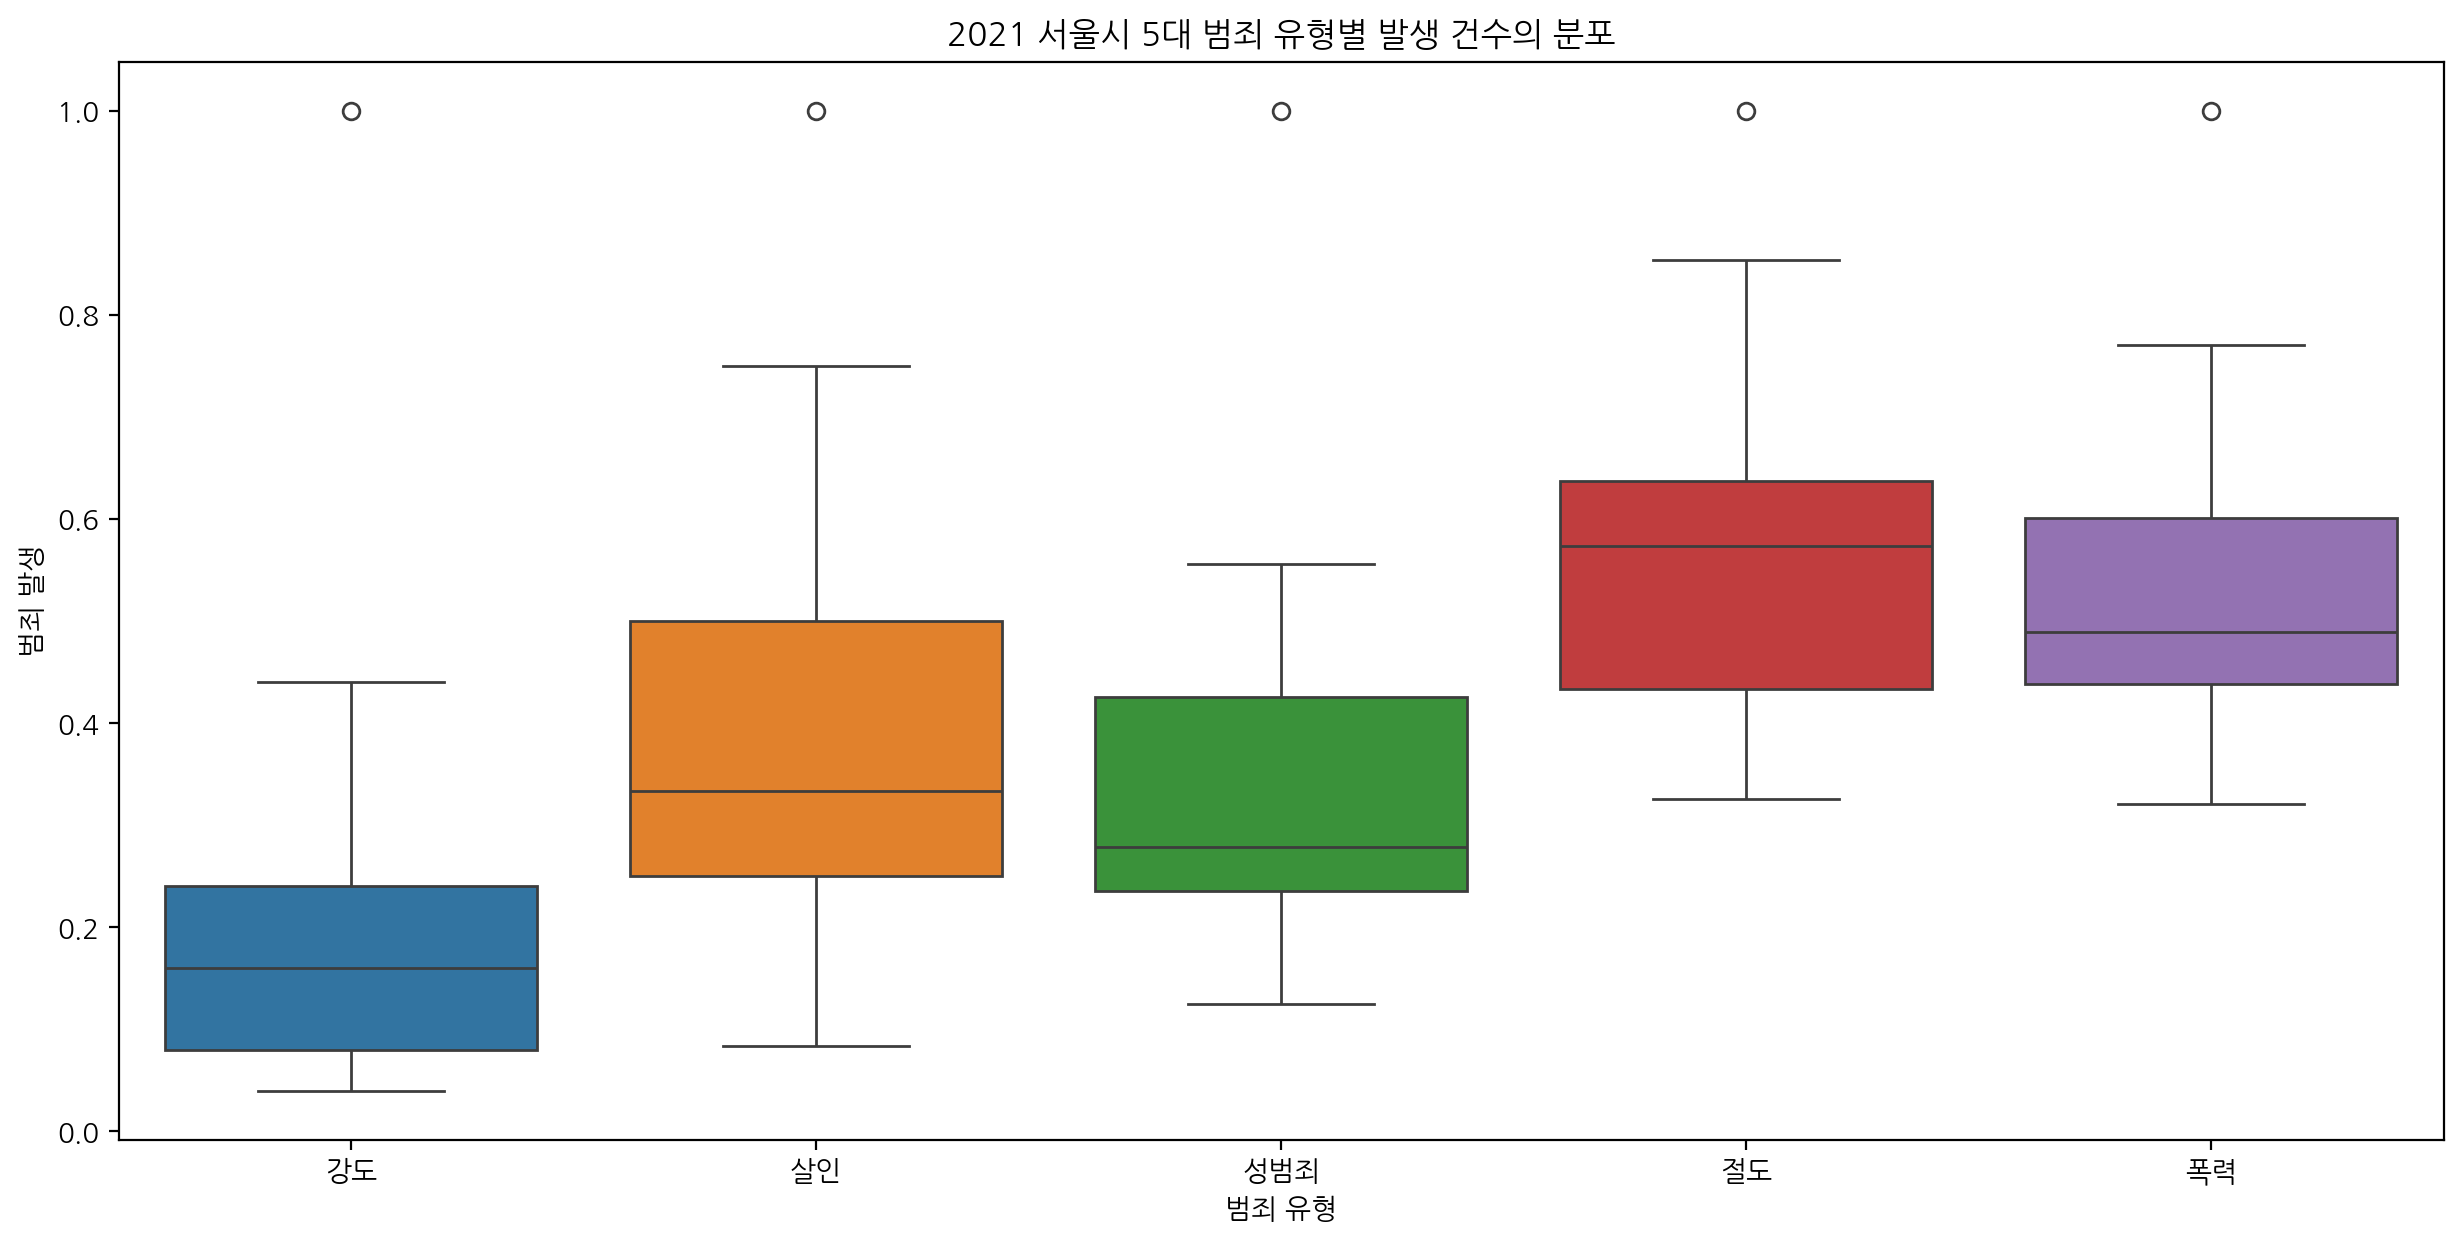

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=crime_gu_norm[five_crime_list])

plt.title('2021 서울시 5대 범죄 유형별 발생 건수의 분포')
plt.ylabel('범죄 발생')
plt.xlabel('범죄 유형')
plt.show()

### Bar plot


#### 서울이 5대 범죄 구별 평균

In [66]:
sorted_crime_gu_norm = crime_gu_norm.sort_values(by='범죄평균', ascending=False)

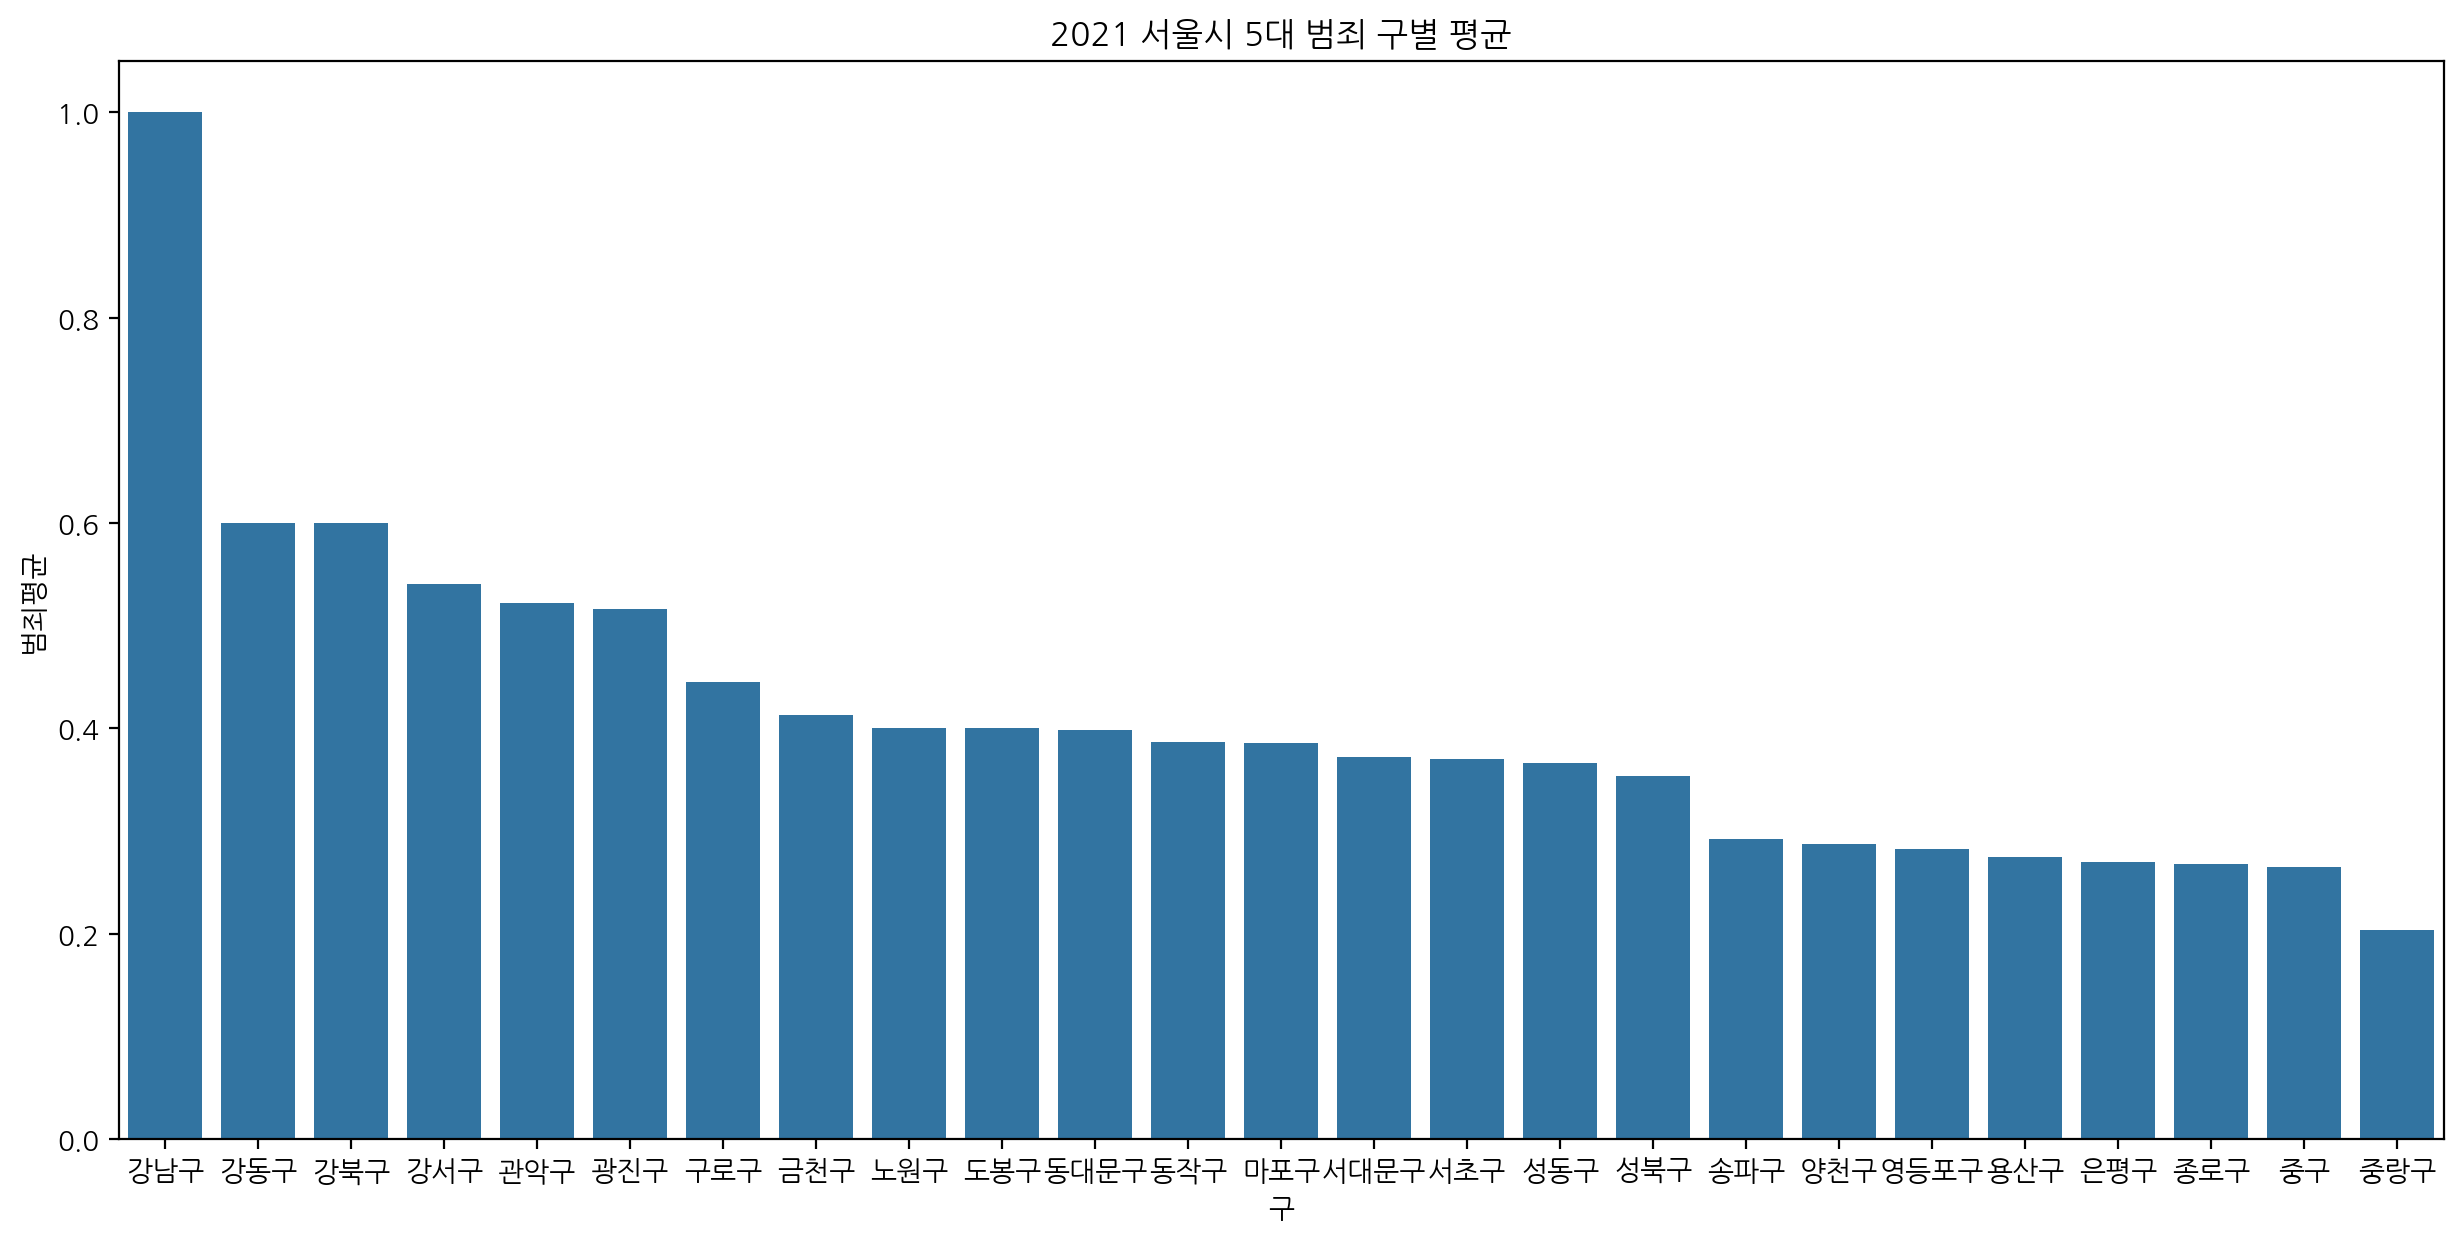

In [67]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.barplot(x=crime_gu_norm.index, y='범죄평균', data=sorted_crime_gu_norm)

plt.title('2021 서울시 5대 범죄 구별 평균')
plt.show()

### Stacked bar plot

#### 구별 5대 범죄 발생 건수

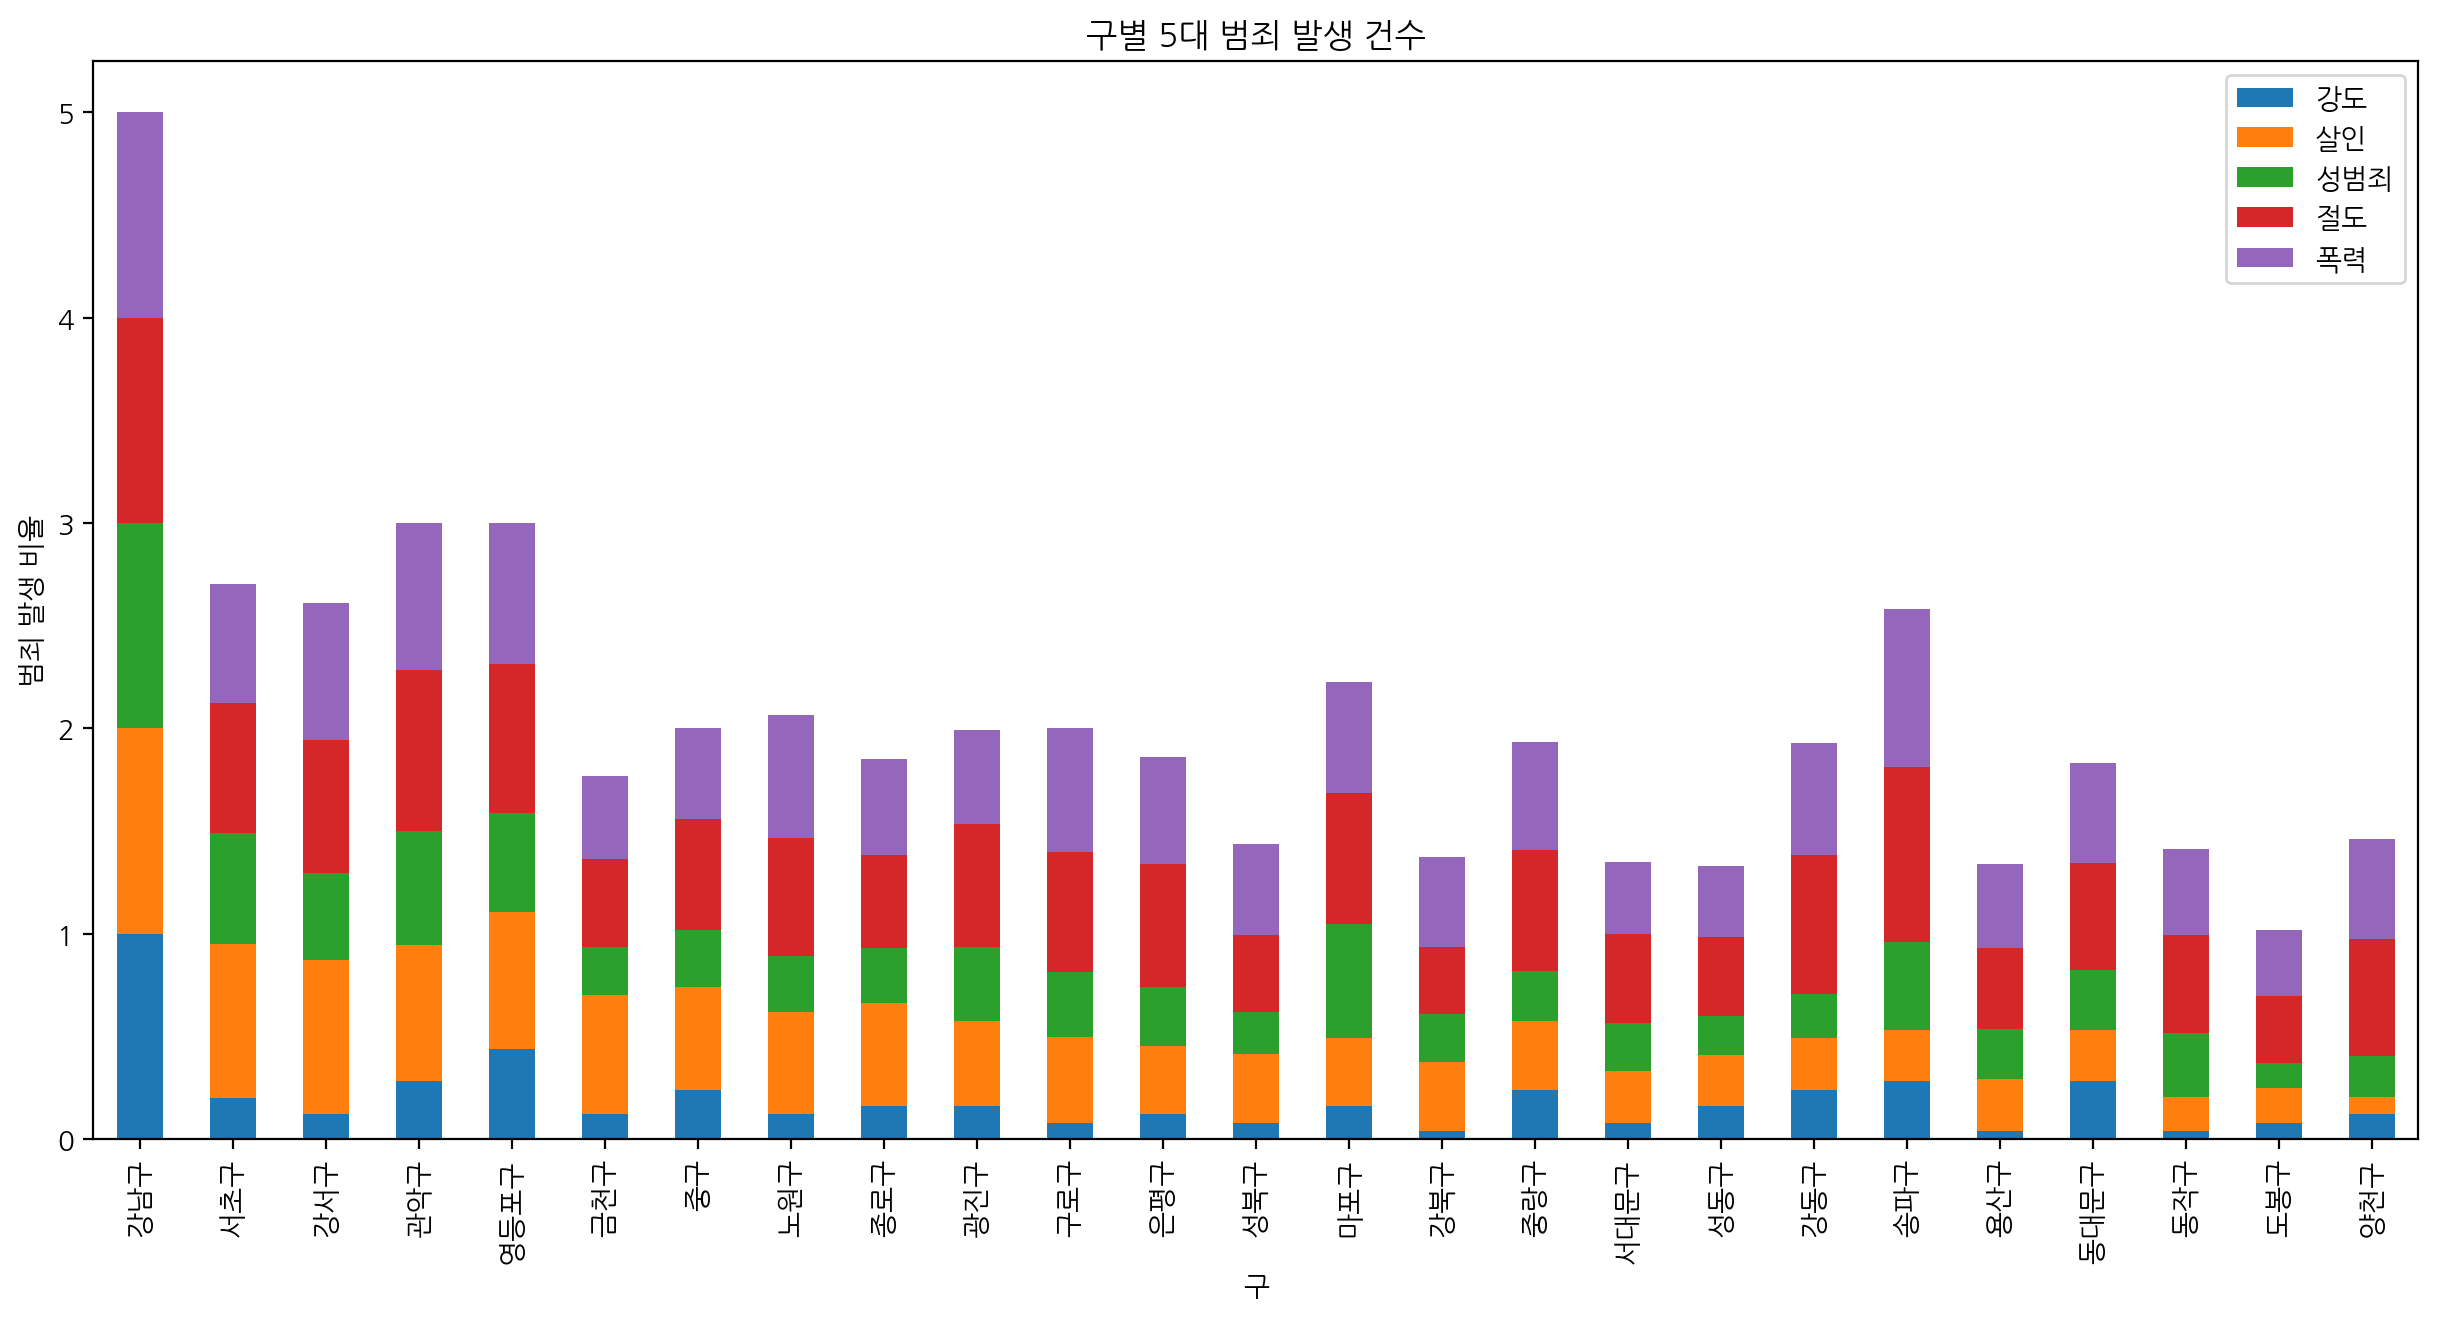

In [68]:
stacked_crime_gu = crime_gu_norm[five_crime_list].sort_values(by='살인', ascending=False)
stacked_crime_gu.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title('구별 5대 범죄 발생 건수')
plt.ylabel('범죄 발생 비율')
plt.xlabel('구')
plt.show()

### heatmap

#### 구별 5대 범죄와 범죄평균에 대한 heatmap

In [69]:
target_col = ['강도', '살인', '성범죄', '절도', '폭력', '범죄평균']
crime_gu_norm[target_col].sort_values(by='범죄평균', ascending=False).head()

,강도,살인,성범죄,절도,폭력,범죄평균
구,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
관악구,0.28,0.666667,0.555363,0.784148,0.711618,0.599559
영등포구,0.44,0.666667,0.482699,0.721754,0.686610,0.599546
서초구,0.20,0.750000,0.539792,0.633642,0.578348,0.540356
강서구,0.12,0.750000,0.425606,0.649241,0.664134,0.521796


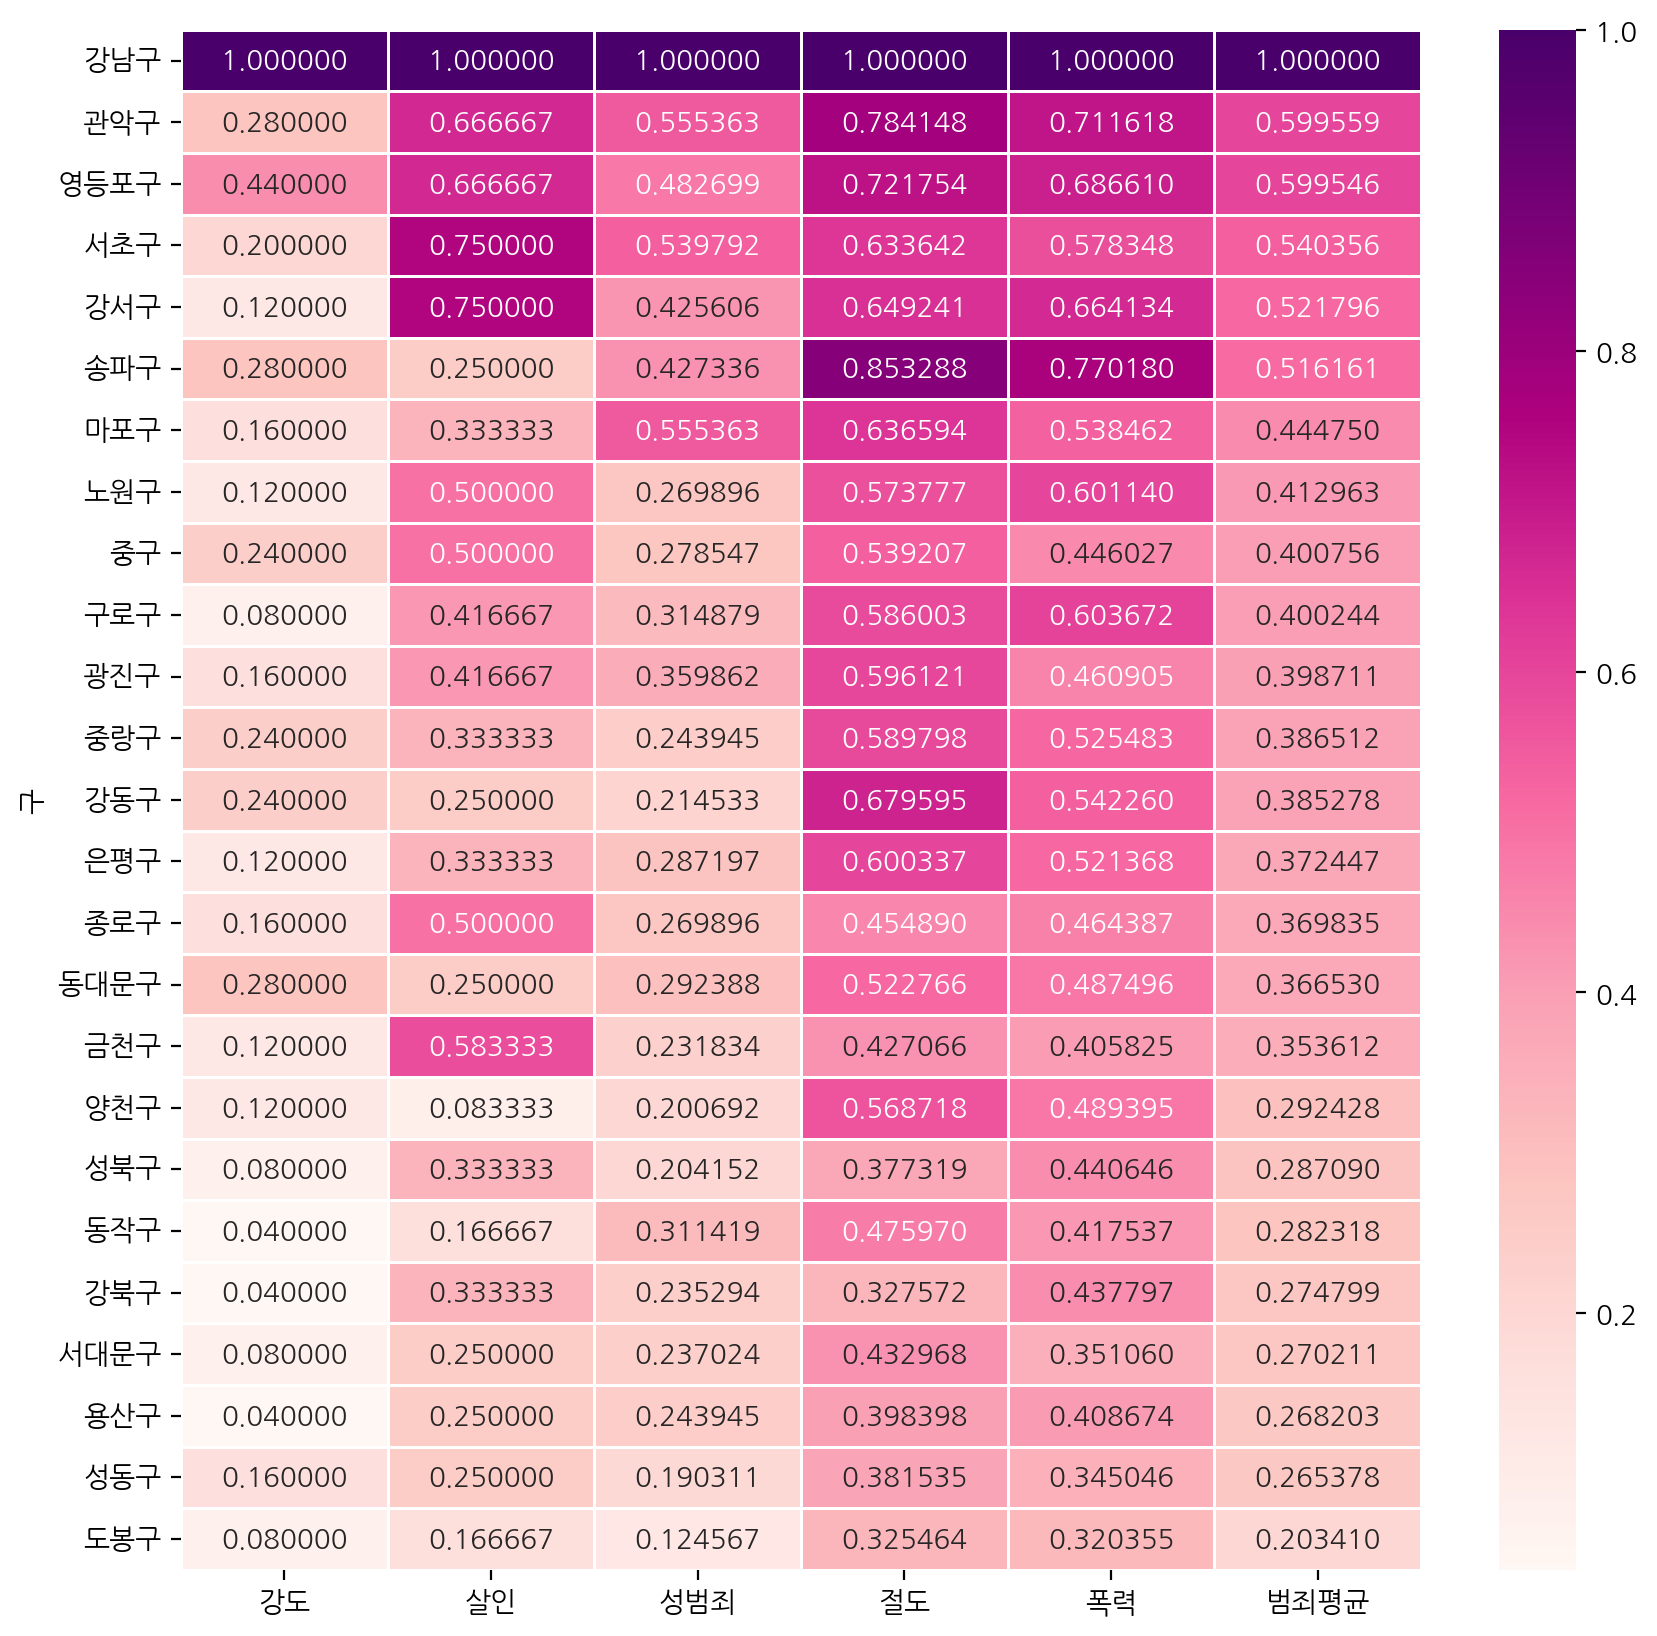

In [70]:
crime_gu_norm_sort = crime_gu_norm[target_col].sort_values(by='범죄평균', ascending=False)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(crime_gu_norm_sort, annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.show()

#### 구별 5대 범죄 검거율과 검거평균에 대한 heatmap

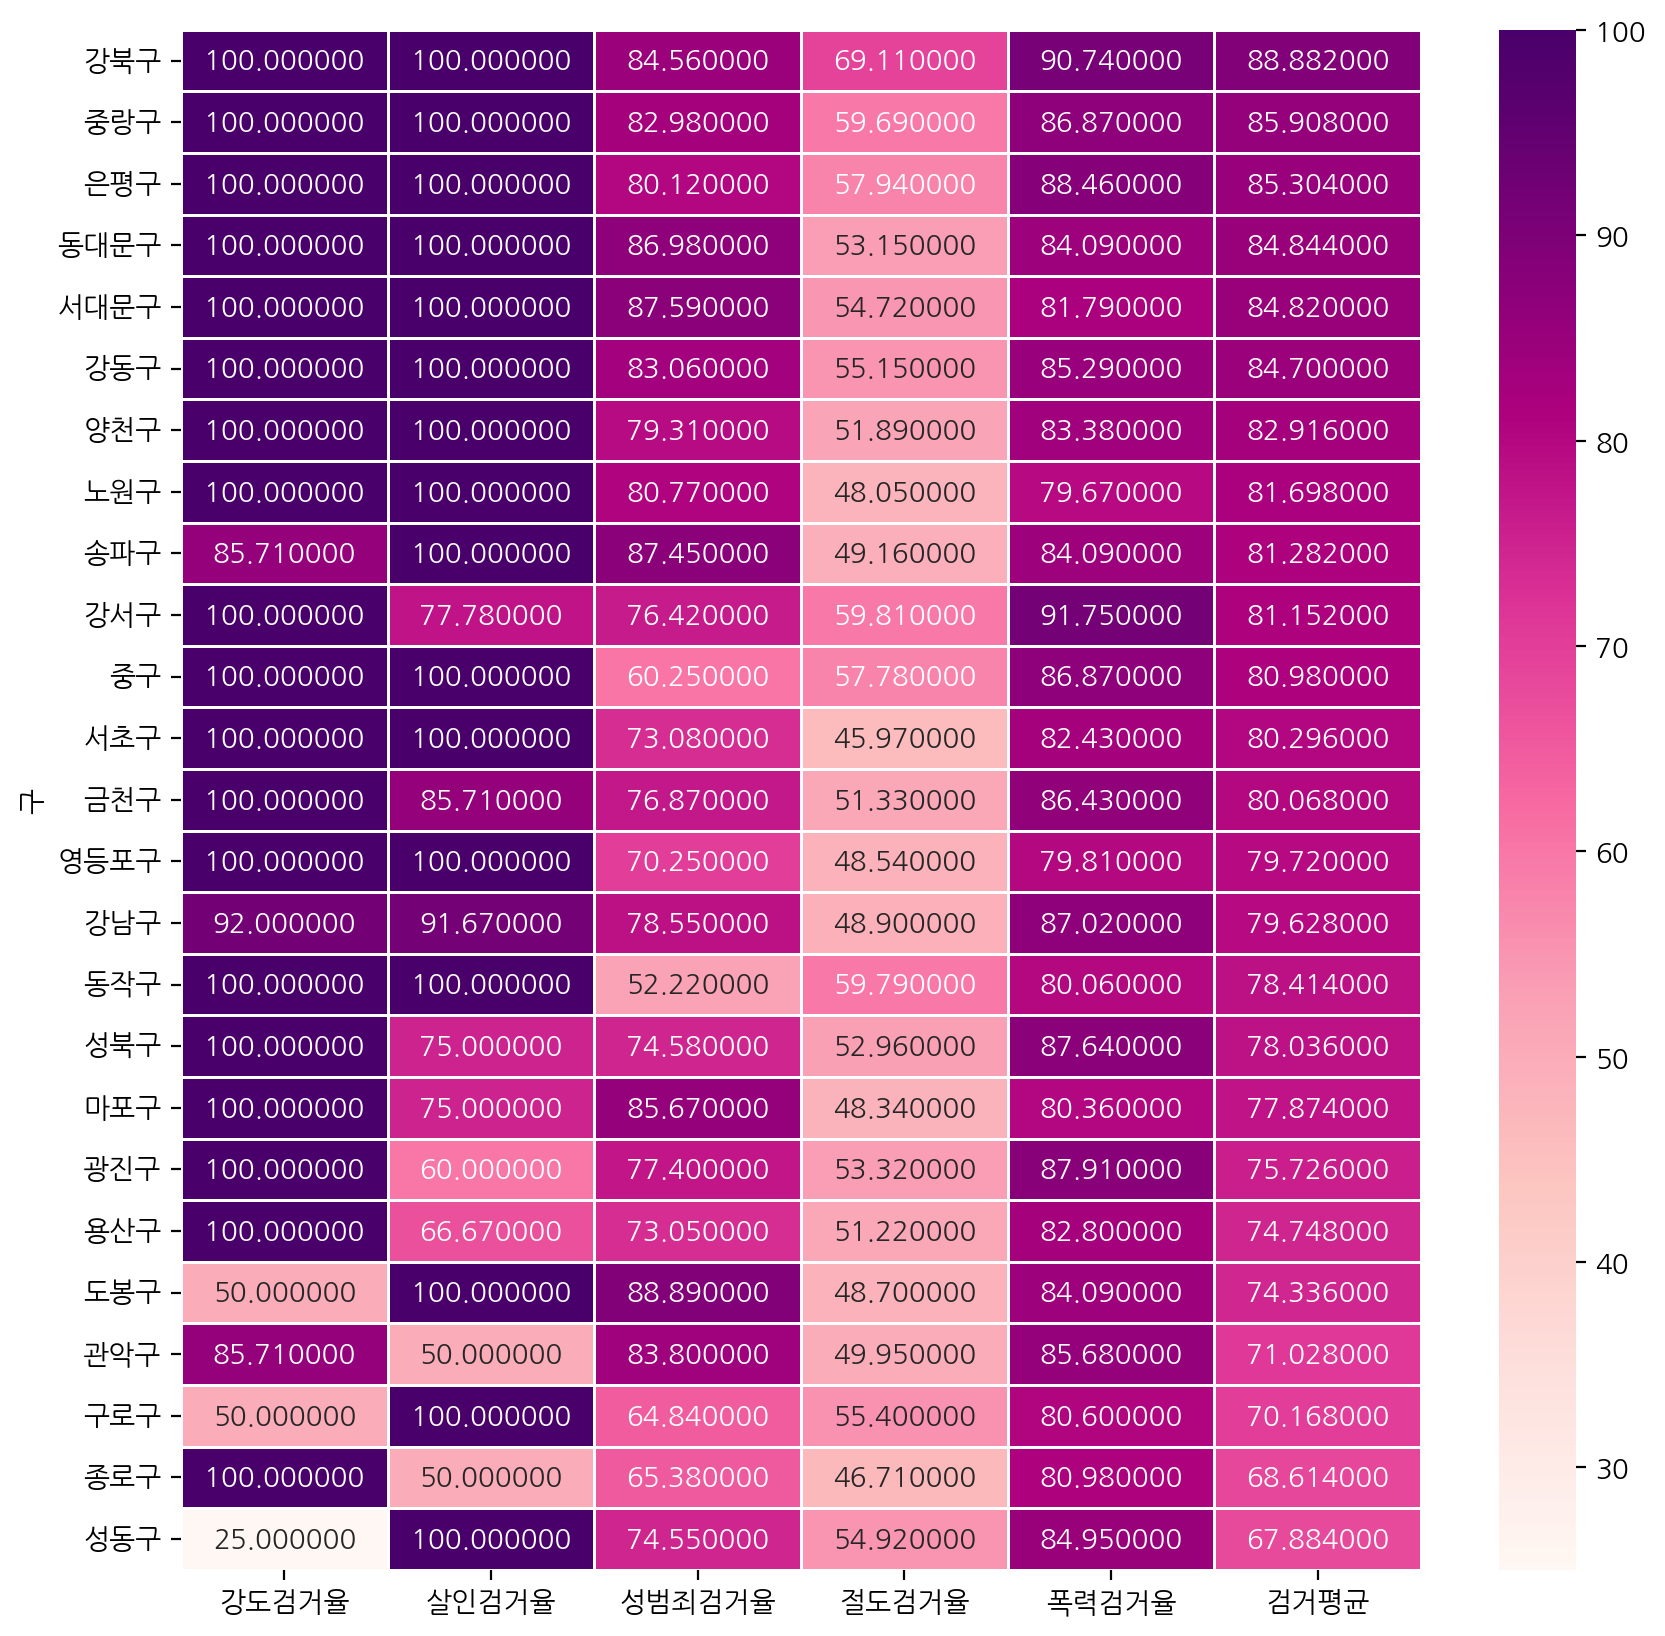

In [71]:
target_col = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율', '검거평균']
crime_gu_norm_sort = crime_gu_norm[target_col].sort_values(by='검거평균', ascending=False)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.show()

## Folium 지도 시각화

Folium은 python에서 지도를 생성하는 라이브러리 <br>
conda로 먼저 설치 후, 안되면 pip로 설치!

- https://python-visualization.github.io/folium/latest/getting_started.html

### 라이브러리 설치

In [72]:
# !conda install -y folium
# !pip install folium

In [73]:
import folium # colab에 설치되어 있음

In [74]:
crime_gu_norm.head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.0,1.0,1.0,1.0,1.0,92.0,91.67,78.55,48.9,87.02,1.0,79.628


### 지도 위에 구 이름 나타내는 아이콘 추가하는 함수 정의

In [83]:
seoul_gu_center_data_path = '/content/drive/MyDrive/my_ws/edu/data_analysis/crime_analysis_seoul_2021/data/centers_of_seoul_districts_2017.csv'
seoul_gu_center = pd.read_csv(seoul_gu_center_data_path, encoding='euc-kr')
seoul_gu_center.head()

,코드,시도명,시군구명,X,Y
0,11110,서울특별시,종로구,126.977321,37.594917
1,11140,서울특별시,중구,126.995968,37.560144
2,11170,서울특별시,용산구,126.979907,37.531385
3,11200,서울특별시,성동구,127.041059,37.551030
4,11215,서울특별시,광진구,127.085744,37.546706


In [82]:
from folium.features import DivIcon

In [84]:
seoul_gu_center.rename(columns={'X':'lng', 'Y':'lat'}, inplace=True)

In [88]:
def display_gu(map):
    for idx, row in seoul_gu_center.iterrows():
        folium.Marker(
            location = [row["lat"], row["lng"]],
            icon=DivIcon(
                icon_size=(90,50),
                icon_anchor=(25, 25),
                html=f'''
                    <div style="font-size:10px;font-weight:bold;color:white;background:grey;padding:1px;border-radius:5px;text-align:center;">
                    {row["시군구명"]}
                    </div>
                '''
            )
        ).add_to(map)

### 서울시에서 일어난 살인 사건 지도 시각화

In [78]:
crime_gu_norm['살인'].head()

,살인
구,
강남구,1.000000
강동구,0.250000
강북구,0.333333
강서구,0.750000
관악구,0.666667


In [90]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

geo_data_path = '/content/drive/MyDrive/my_ws/edu/data_analysis/crime_analysis_seoul_2021/data/02. skorea_municipalities_geo_simple.json'
folium.Choropleth(
    geo_data=geo_data_path, # 서울시 경계선 좌표값이 담긴 지리 데이터
    data=crime_gu_norm['살인'],
    columns=[crime_gu_norm.index, crime_gu_norm['살인']], # ['지리데이터', '나타내고싶은데이터']
    key_on='feature.id',

    # 꾸미는 옵션
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='정규화된 살인 발생 건수'
).add_to(my_map)

display_gu(my_map)
my_map

인접해있는 강남구와 서초구에서 살인사건이 많이 일어남

### 서울시에서 일어난 성범죄 사건 지도 시각화

In [91]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11
)

geo_data_path = '/content/drive/MyDrive/my_ws/edu/data_analysis/crime_analysis_seoul_2021/data/02. skorea_municipalities_geo_simple.json'
folium.Choropleth(
    geo_data=geo_data_path, # 서울시 경계선 좌표값이 담긴 지리 데이터
    data=crime_gu_norm['성범죄'],
    columns=[crime_gu_norm.index, crime_gu_norm['성범죄']], # ['지리데이터', '나타내고싶은데이터']
    key_on='feature.id',

    # 꾸미는 옵션
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='정규화된 성범죄 발생 건수'
).add_to(my_map)

display_gu(my_map)
my_map

강남구에서 성범죄 사건이 많이 일어남